In [1]:
#Import library
from IPython.display import Image

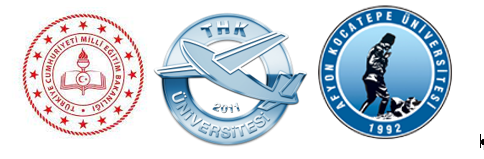

In [3]:
Image(filename = "imgs/katilimcilar.png", width = 300)

## Hesaplamalı Grafik Nedir?
- Bir hesaplama grafik, düğümlerin matematiksel işlemlere karşılık geldiği yönlendirilmiş bir grafik olarak tanımlanır. 
- Hesaplamalı grafikler, matematiksel bir ifadeyi ifade etmenin ve değerlendirmenin bir yoludur.
- Düğümler, tüm girdileri ve hesaplanan miktarları temsil eder ve kenarlar, hangi düğümlerin doğrudan hangi diğer düğümlerin bir fonksiyonu olarak hesaplandığını temsil eder.

- Örneğin, burada basit bir matematiksel denklem $p=x+y$ hesaplama grafiği:

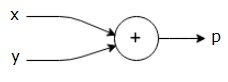

In [53]:
Image(filename = "imgs/computational_graph_equation1.jpg", width = 150)

Yukarıdaki hesaplama grafiğinde, iki giriş değişkeni $x$ ve $y$ ve bir çıkış $q$ ile bir ek düğüm ("+" işaretli düğüm) sahiptir.

Biraz daha karmaşık başka bir örnek alalım. $g=(x+y)∗z$ denkleminin hesaplama grafiği:

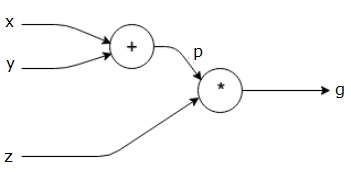

In [52]:
Image(filename = "imgs/computational_graph_equation2.jpg", width = 200)

Bu grafikteki tüm girdilere bir değer vererek bir örnek düşünelim. Yani, 
\begin{equation}
x=1,y=3,z=−3
\end{equation}

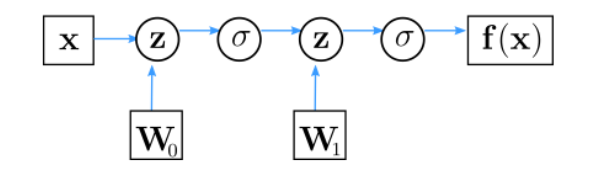

In [6]:
Image(filename = "imgs/Computation-Graph.png", width = 300)

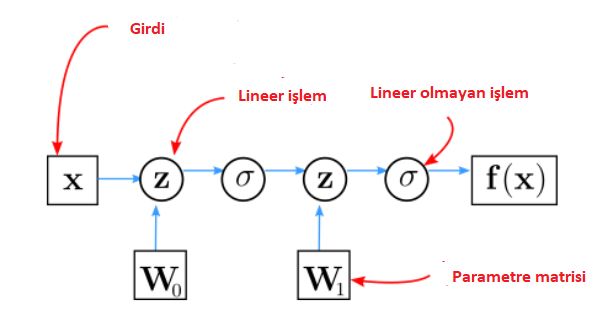

In [7]:
Image(filename = "imgs/Computation-Graph-2a.png", width = 300)

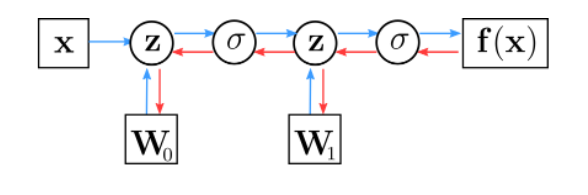

In [8]:
Image(filename = "imgs/Computation-Graph-3.png", width = 300)

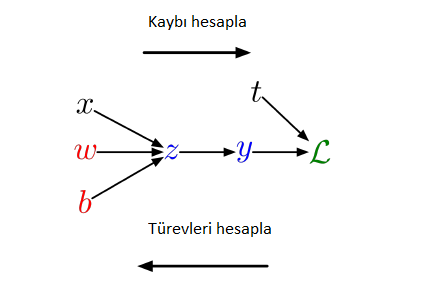

In [9]:
Image(filename = "imgs/computation_graph_1.png", width = 300)

- Yukarıda diğer bir hesaplamalı grafik
- Kayıp
\begin{align}
z&=wx+b\\
y&=\sigma(z)\\
\mathcal{L}&=\frac{1}{2}(y-t)^{2}
\end{align}
- Türevler
\begin{align}
\frac{d\mathcal{L}}{dy}&=y-t\\
\frac{d\mathcal{L}}{dz}&=\frac{d\mathcal{L}}{dy}\sigma^{\prime}(z)\\
\frac{d\mathcal{L}}{dw}&=\frac{d\mathcal{L}}{dz}x\\
\frac{d\mathcal{L}}{db}&=\frac{d\mathcal{L}}{dz}
\end{align}
- Türev hesabı:
$\bar{y}=\frac{d\mathcal{L}}{dy}$ diyelim. O zaman
\begin{align}
\bar{y}&=y-t\\
\bar{z}&=\bar{y}\sigma^{\prime}(z)\\
\bar{w}&=\bar{z}x\\
\bar{b}&=\bar{z}
\end{align}

# Nöron Model

- Sinir ağları kavramını ve nasıl çalıştıklarını hızlıca gözden geçirelim. 
- Bir sinir ağı, temel olarak bir insan beyninin nasıl öğrendiğini taklit eden çok güçlü bir makine öğrenme mekanizmasıdır.

- Beyin dış dünyadan uyarıyı alır, girdi üzerinde işlem yapar ve çıktıyı üretir. Görev karmaşıklaştıkça, birden fazla nöron karmaşık bir ağ oluşturarak bilgileri kendi aralarında iletir.

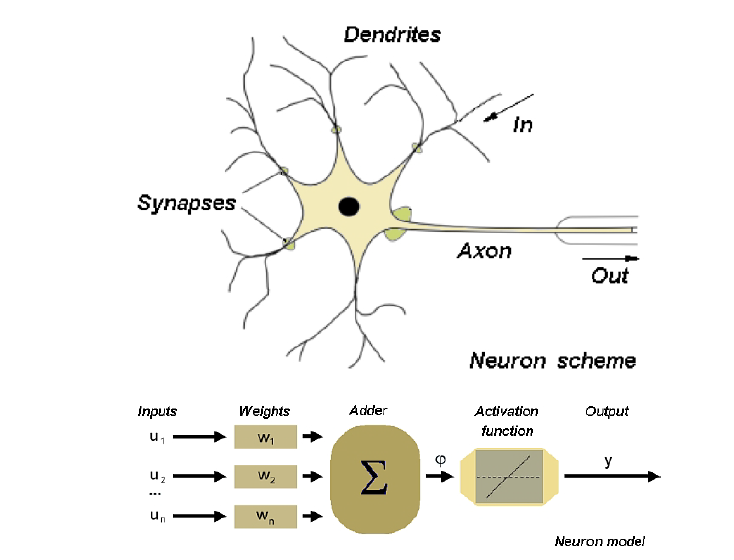

In [10]:
Image(filename = "imgs/first_generation_nn.png", width = 400)

- Bir Yapay Sinir Ağı benzer bir davranışı taklit etmeye çalışır. 
- Aşağıda gördüğünüz ağ, birbirine bağlı nöronlardan oluşan bir sinir ağıdır. Her nöron ağırlığı, bias (yanlılık, önyargı) ve aktivasyon fonksiyonu ile karakterize edilir.

### Tek girdili Nöron

- Aşağıdaki şekilde görülebilir.

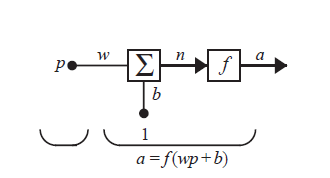

In [18]:
Image(filename = "imgs/single_neuron.png", width = 300)

Nöron çıktısı:
\begin{equation}
a=f(wp+b)
\end{equation}
denklemi ile hesaplanır.

Örneğin, $w=3$, $p=2$ ve $b=-1,5$ aldığımızda
\begin{equation}
a=f(3\times 2+(-1,5))=f(4,5)
\end{equation}
Gerçek çıktı ise transfer(aktivasyon) foksiyonuna bağlıdır, ve nasıl seçildiği önemlidir.

Bias, bir ağırlık gibidir, ancak girdi değeri 1'dir.

Dikkat edelim ki $w$ ve $b$ değerlerinin her ikisi nöronun ayarlanabilir parametreleridir.

#### Aktivasyon fonksiyonu olmadan yapabilir miyiz?
- Bir aktivasyon fonksiyonu kullanmanın maliyeti, ileri yayılma sırasında her katmanda ek bir adım getirmektedir. 
- Şimdi soru şu – eğer aktivasyon fonksiyonu maliyeti arttırıyorsa, aktivasyon fonksiyonu olmadan yapabilir miyiz?
    - Herhangi bir lineer katman dizisi, tek bir lineer katmanla eşdeğer olarak temsil edilebilir.
    \begin{equation}
    y=\underbrace{{\bf W}^{(L)}{\bf W}^{(L-1)}\cdots {\bf W}^{(1)}}{\bf x}\\
    \quad\quad\quad\quad\quad\bar{{\bf W}}
    \end{equation}

- Aktivasyon fonksiyonları olmayan bir sinir ağı düşünelim. Bu durumda, her nöron, ağırlıkları ve önyargıları kullanarak girdiler üzerinde yalnızca doğrusal bir dönüşüm gerçekleştirecektir. Doğrusal dönüşümler sinir ağını daha basit hale getirse de, bu ağ daha az güçlü olacak ve karmaşık kalıpları verilerden öğrenemeyecektir.

- Aktivasyon fonksiyonu olmayan bir sinir ağı, esasen sadece bir lineer regresyon modelidir.

- Böylece, nöronun girişlerine doğrusal olmayan bir dönüşüm kullanmalıyız ki ağdaki bu doğrusal olmayanlık oluşsun.
- Bu işlevi aktivasyon fonksiyonu tarafından yapılır.

- Şimdi Aktivasyon Fonksiyonları türlerine, bunların matematiksel denklemlerine, grafiksel temsillerine ve python kodlarına bakalım.

### Transfer(Aktivasyon) Fonksiyonları

- Transfer Fonksiyonları aynı zamanda aktivasyon fonksiyonlarıolarakta anılırlar.
- Lineer veya lineer olmayan olabilirler.
- Nöronun çözmeye çalıştığı problemin bazı özelliklerini karşılamak için belirli bir transfer fonksiyonu seçilir.

#### Sabit Limit Transfer Fonksiyonu
- Ağağıdaki şekilin sol tarafında gösterilen sabit limit transfer fonksiyonu, fonksiyon argümanı 0'dan küçükse nöronun çıkışını 0'a veya argümanı 0'dan büyük veya ona eşitse 1'e ayarlar.

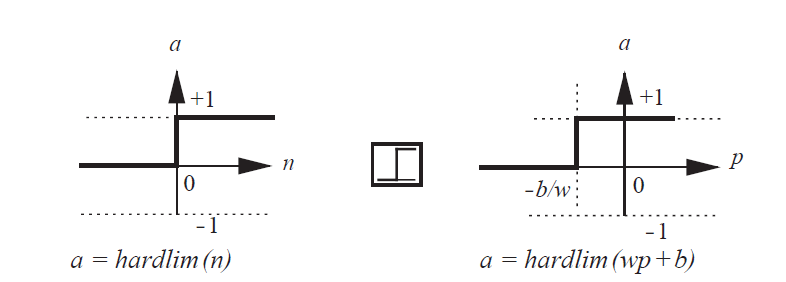

In [17]:
Image(filename = "imgs/hardlim.png", width = 400)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from IPython.display import Image

In [33]:
def binaryStep(x):
    ''' It returns '0' is the input is less 
    then zero otherwise it returns one '''
    return np.heaviside(x,1)

In [34]:
x = np.linspace(-5, 5, 1000)

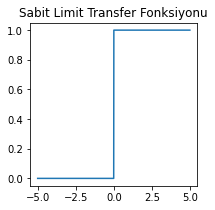

In [37]:
plt.figure(figsize=(3,3))
plt.plot(x, binaryStep(x))
plt.axis('tight')
plt.title('Sabit Limit Transfer Fonksiyonu')
plt.show()

#### Doğrusal Limit Transfer Fonksiyonu
- Doğrusal bir transfer fonksiyonunun çıktısı, girdisine eşittir.

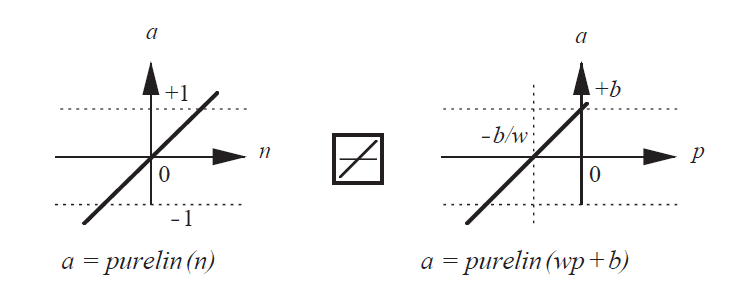

In [16]:
Image(filename = "imgs/purelin.png", width = 400)

In [39]:
def linear(x):
    ''' y = f(x) It returns the input as it is'''
    return x

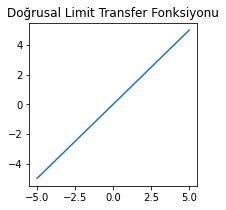

In [40]:
plt.figure(figsize=(3,3))
plt.plot(x, linear(x))
plt.axis('tight')
plt.title('Doğrusal Limit Transfer Fonksiyonu')
plt.show()

####  Sigmoid Transfer Fonksiyonu
- Bu transfer fonksiyonu bir girdiyi alır (artı ile eksi sonsuz arasında herhangi bir değere sahip olabilir) ve çıktıyı aşağıdaki denklemi kullanarak 0 ile 1 aralığına sıkıştırır:
\begin{equation}
a(n)=\frac{1}{1+e^{-n}}
\end{equation}
- Logistik transfer fonksiyonu olarakta bilinir.

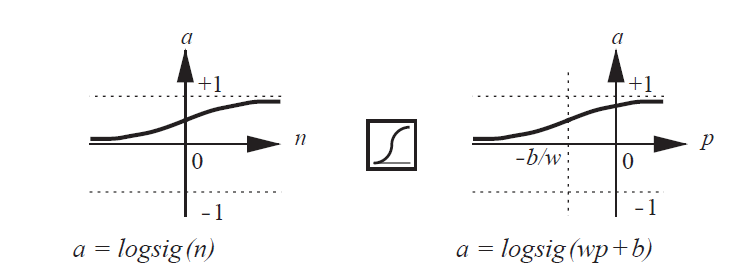

In [15]:
Image(filename = "imgs/logsig.png", width = 400)

- Log-sigmoid transfer fonksiyonu, türevlenebilir olması nedeniyle, geri yayılım algoritması kullanılarak eğitilen birçok katmanlı ağlarda yaygın olarak kullanılır.

In [41]:
def sigmoid(x):
    ''' It returns 1/(1+exp(-x)). where 
    the values lies between zero and one '''

    return 1/(1+np.exp(-x))

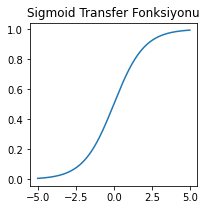

In [42]:
plt.figure(figsize=(3,3))
plt.plot(x, sigmoid(x))
plt.axis('tight')
plt.title('Sigmoid Transfer Fonksiyonu')
plt.show()

####  Tanjant Hiperbolik Transfer Fonksiyonu
- Bu transfer fonksiyonu bir girdiyi alır (artı ile eksi sonsuz arasında herhangi bir değere sahip olabilir) ve çıktıyı aşağıdaki denklemi kullanarak -1 ile 1 aralığına sıkıştırır:
\begin{equation}
a(n)=\frac{1-e^{-2n}}{1+e^{-2n}}
\end{equation}

In [43]:
def tanh(x):
    ''' It returns the value (1-exp(-2x))/(1+exp(-2x)) 
    and the value returned will be lies in between -1 to 1.'''
    return np.tanh(x)

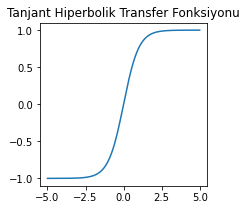

In [44]:
plt.figure(figsize=(3,3))
plt.plot(x, tanh(x))
plt.axis('tight')
plt.title('Tanjant Hiperbolik Transfer Fonksiyonu')
plt.show()

### RELU Transfer Fonksiyonu
- RELU, derin öğrenme ağlarında kullanılan ve iyi bilinen bir transfer fonksiyonudur. 
- RELU, diğer doğrusal olmayan aktivasyon fonksiyonlarına göre hesaplama açısından daha az maliyetlidir.
\begin{equation}
Relu(n)=
\begin{cases}
  0  & n<0 \\
  n & n\ge 0
\end{cases}
\end{equation}

In [45]:
def RELU(x):
    ''' It returns zero if the input is less than zero otherwise it returns the given input. '''
    x1=[]
    for i in x:
        if i<0:
            x1.append(0)
        else:
            x1.append(i)
    return x1

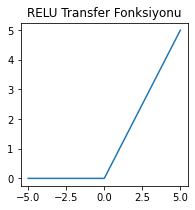

In [46]:
plt.figure(figsize=(3,3))
plt.plot(x, RELU(x))
plt.axis('tight')
plt.title('RELU Transfer Fonksiyonu')
plt.show()

### Softmax Aktivasyon Fonksiyonu
Softmax, çok sınıflı bir sınıflandırma sinir ağının son doğrusal katmanının sayısal çıktısı olan logitleri olasılıklara dönüştürür.
\begin{equation}
a(n_{i})=\frac{e^{n_{i}}}{\sum_{i}{e^{n_{i}}}}
\end{equation}

In [47]:
def softmax(x):
    ''' Compute softmax values for each sets of scores in x. '''
    return np.exp(x) / np.sum(np.exp(x), axis=0)

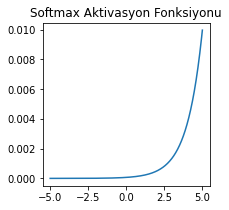

In [48]:
plt.figure(figsize=(3,3))
plt.plot(x, softmax(x))
plt.axis('tight')
plt.title('Softmax Aktivasyon Fonksiyonu')
plt.show()

### Çoklu Girişli Nöron
- Tipik bir nöronun birden fazla girişi vardır. 
- Girdileri sayısı $R$ olan bir nöron Şekil Şekil :numref:`fig_multi_input`'de gösterilmiştir. Bireysel girdiler $p_{1},p_{2},\cdots,p_{R}$ her biri, ağırlık matrisi ${\bf W}$'nin karşılık gelen $w_{1,1},w_{1,2},\cdots,w_{1,R}$ elemanlarıyle ağırlıklandırılır.

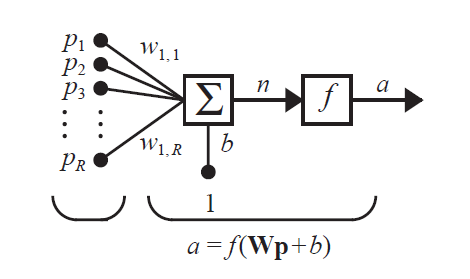

In [19]:
Image(filename = "imgs/multi_input_neuron.png", width = 300)

- Nöronun, net girdi $n$'yi oluşturmak için ağırlıklı girdilerle toplanan bir $b$ bias değeri vardır:
\begin{equation}
n=w_{1,1}p_{1}+w_{1,2}p_{2}+\cdots,+w_{1,R}p_{R}+b
\end{equation}
- Bu ifade matris formunda yazılabilir. O zaman
\begin{equation}
n={\bf W}{\bf p}+b
\end{equation}
burada ${\bf W}$ matrisi tek nöron olduğundan sadece tek satıra sahiptir.
- Şimdi nöron çıktısı şu şekilde yazılabilir:
\begin{equation}
a=f({\bf W}{\bf p}+b)
\end{equation}
- Çoklu girişli nöron kompack gösterimi:

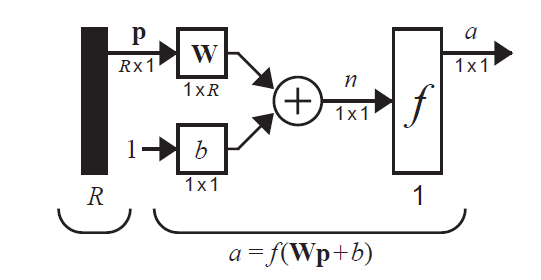

In [11]:
Image(filename = "imgs/multi_input_neuron_compact.png", width = 300)

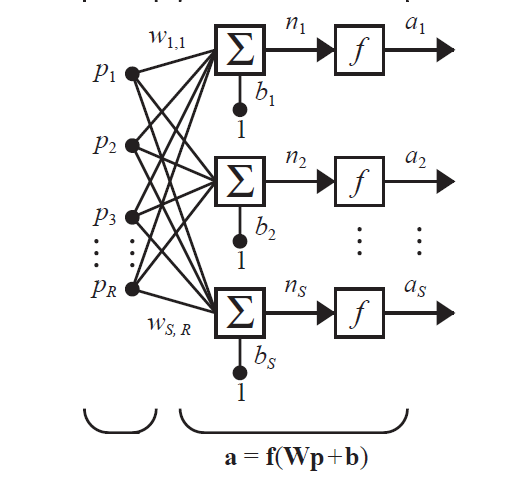

In [12]:
Image(filename = "imgs/multi_input_multi_layer_neuron.png", width = 300)

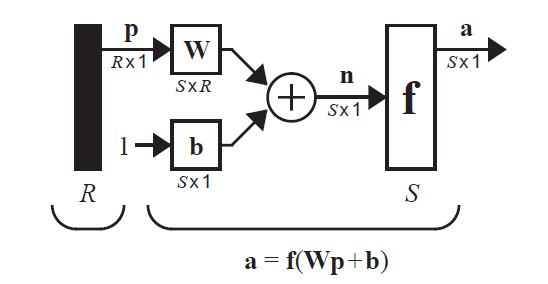

In [13]:
Image(filename = "imgs/one_layer_network_compact.png", width = 300)

![Tek girdili nöron.](imgs/computation_graph2.png)
\begin{equation}
e=l(f_{1}(x,w_{1}),y)
\end{equation}

\begin{array}{rcl}
\frac{\partial e}{\partial w_{1}}&=&\frac{\partial}{\partial w_{1}}l(f_{1}(x,w_{1}),y)\\
&=&\frac{\partial e}{\partial h_{1}}\frac{\partial h_{1}}{\partial w_{1}}
\end{array}

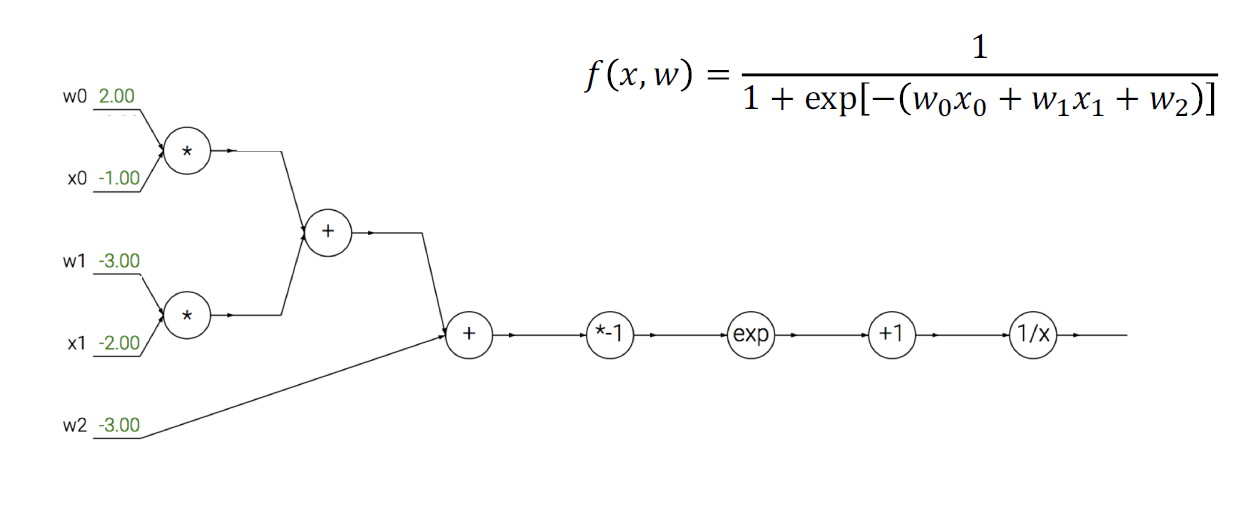

In [21]:
Image(filename = "imgs/train_example1_0.png", width = 600)

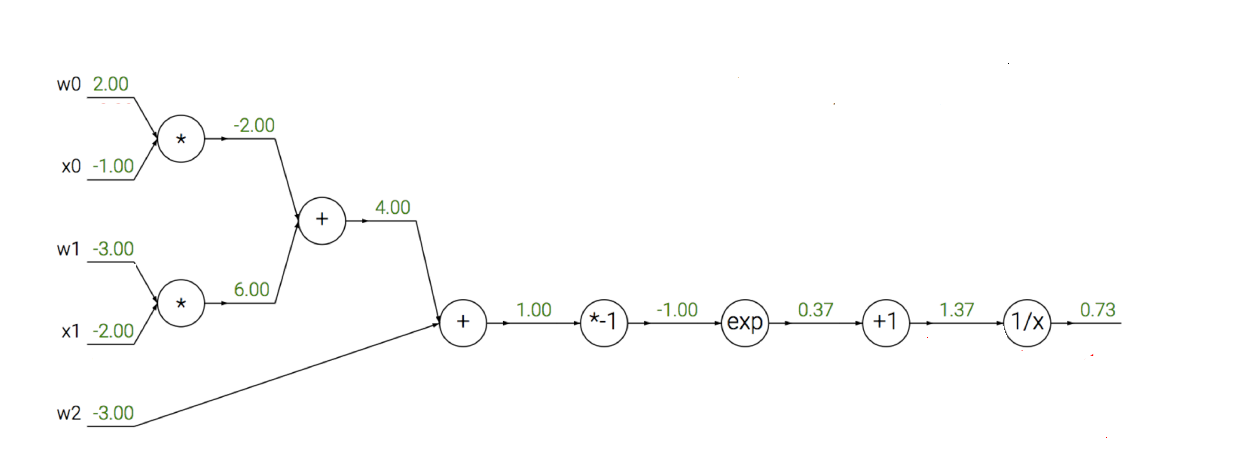

In [22]:
Image(filename = "imgs/train_example1.png", width = 600)

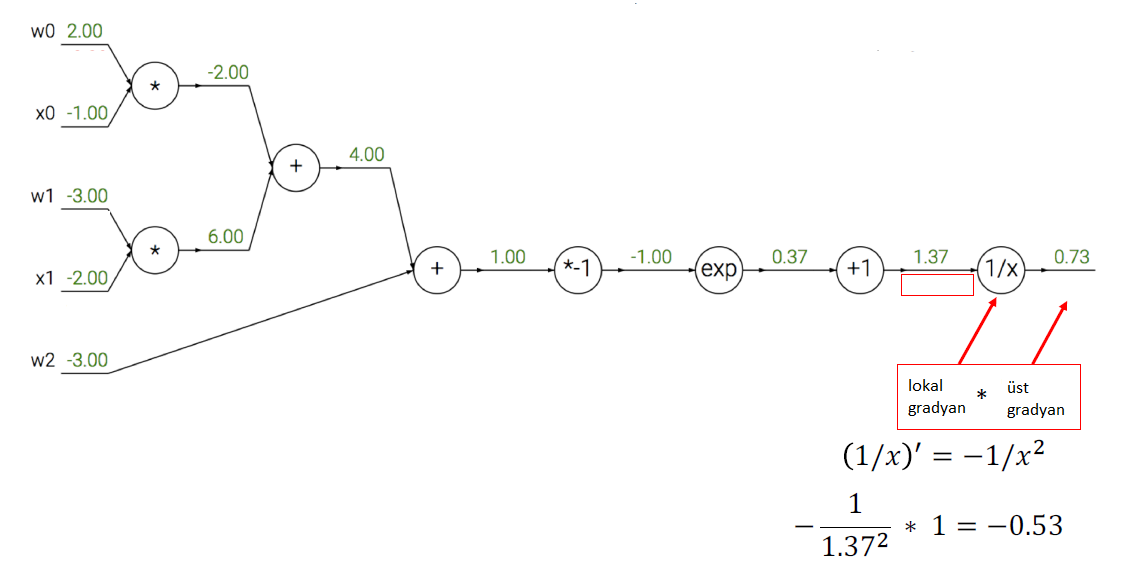

In [23]:
Image(filename = "imgs/train_example2.png", width = 600)

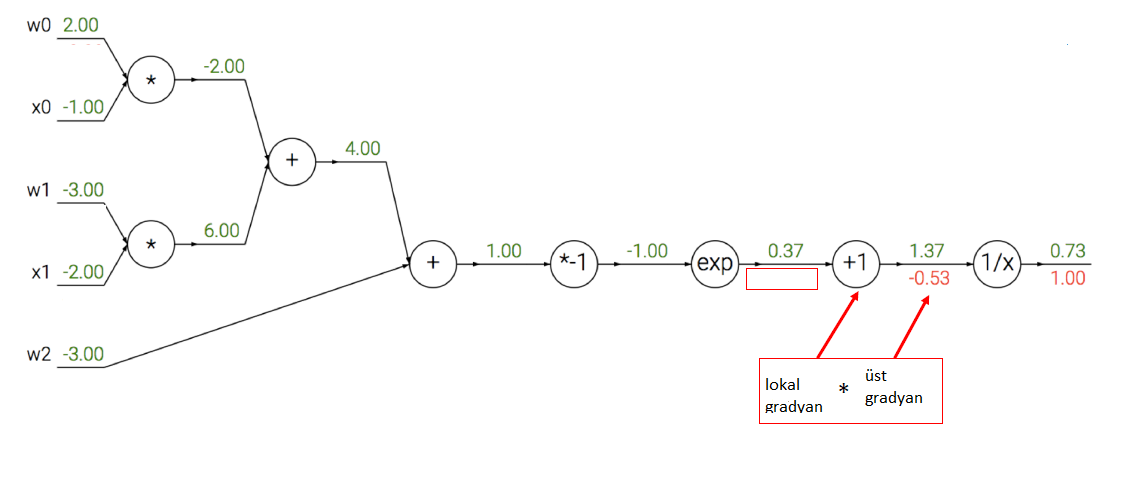

In [24]:
Image(filename = "imgs/train_example3.png", width = 600)

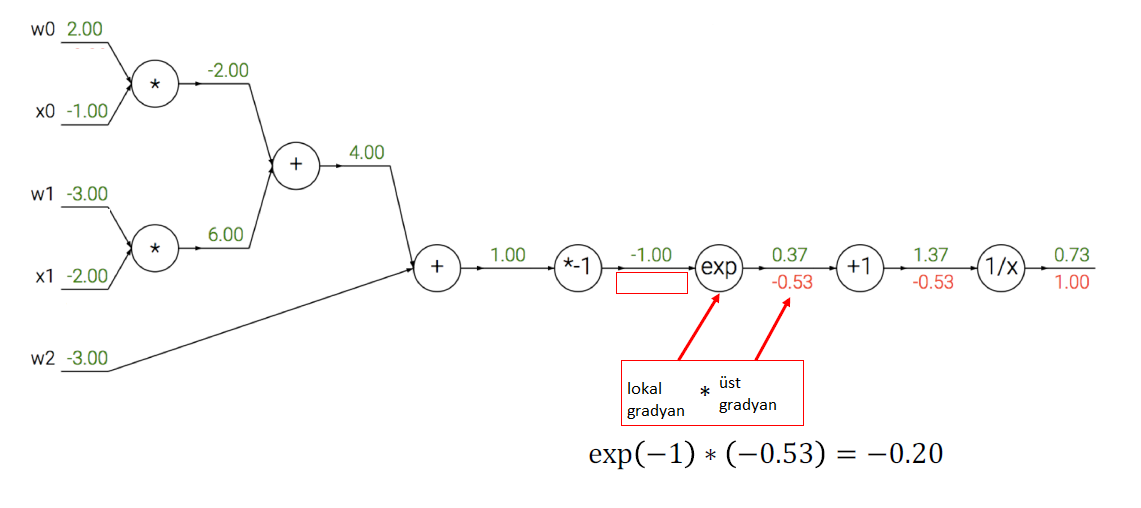

In [25]:
Image(filename = "imgs/train_example4.png", width = 600)

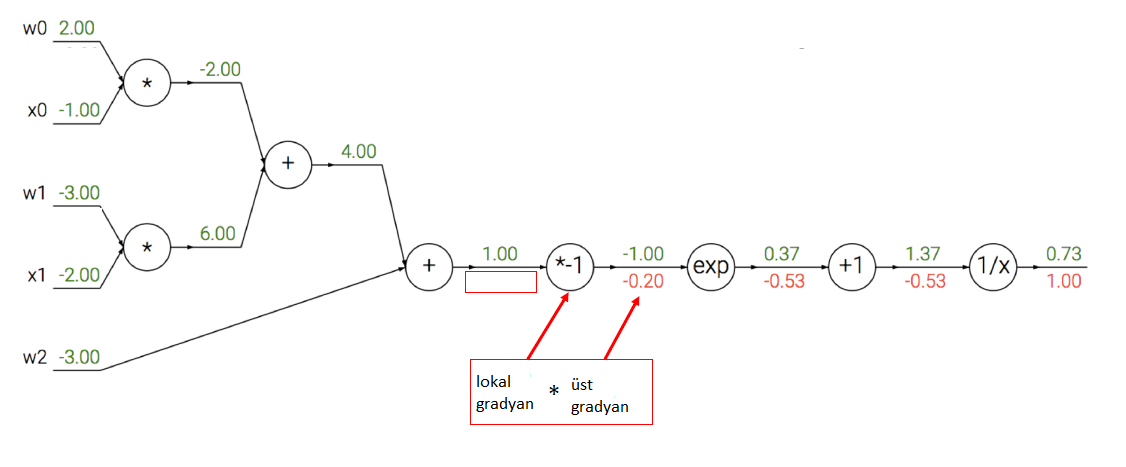

In [26]:
Image(filename = "imgs/train_example5.png", width = 600)

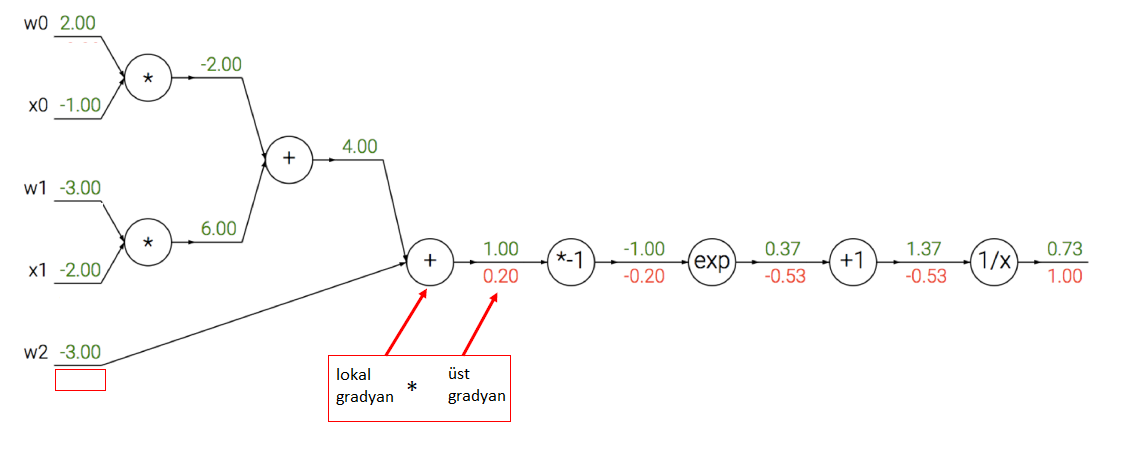

In [27]:
Image(filename = "imgs/train_example6.png", width = 600)

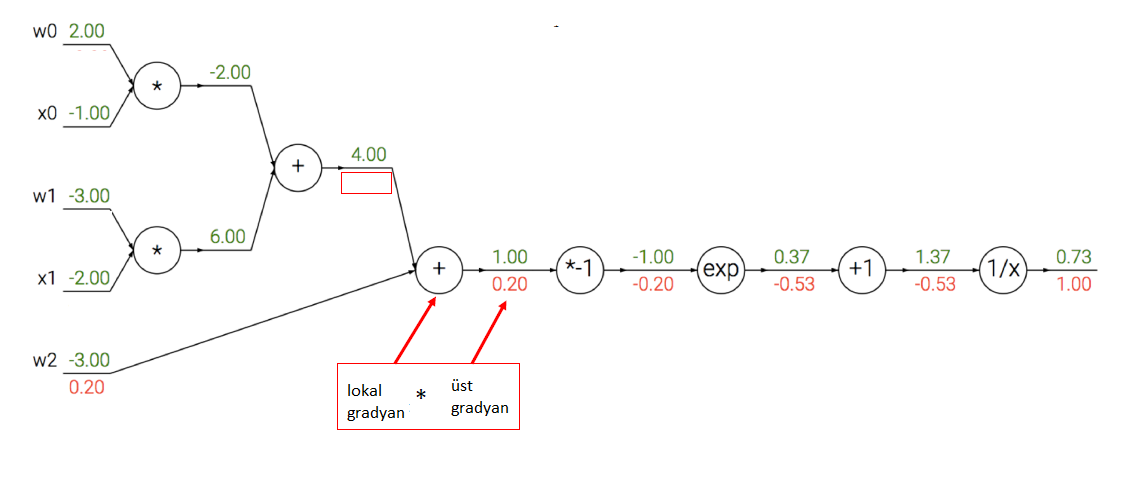

In [28]:
Image(filename = "imgs/train_example7.png", width = 600)

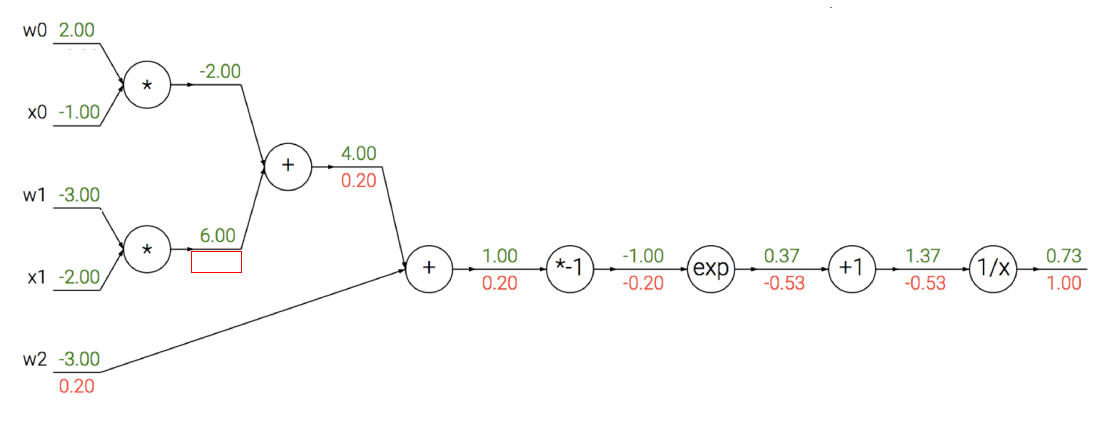

In [29]:
Image(filename = "imgs/train_example8.png", width = 600)

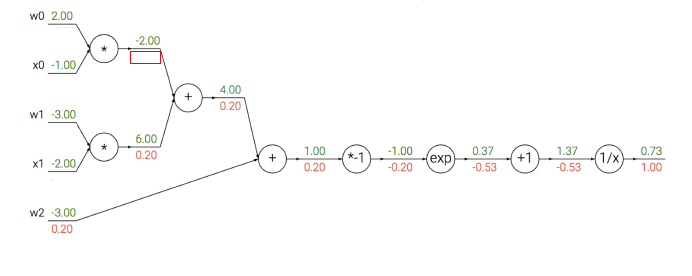

In [30]:
Image(filename = "imgs/train_example9.png", width = 600)